In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression

In [2]:
file = 'Resources/master.csv'
df = pd.read_csv(file)
df

,Unnamed: 0,Name,Address,Latitude,Longitude,Table Name,Tract
0,0,Mad Eliza's Cakes & Confections,Topeka,39.001626,-95.782089,bakery,36.04
1,1,Sam's Club Bakery,"1401 Southwest Wanamaker Road, Topeka",39.041499,-95.764625,bakery,36.07
2,2,Cold Stone Creamery,"1227 Southwest Wanamaker Road Ste 100, Topeka",39.044995,-95.763936,bakery,24.01
3,3,Smallcakes Topeka,"1223 Southwest Wanamaker Road #300, Topeka",39.044989,-95.762344,bakery,24.01
4,4,Panera Bread,"1421 Southwest Wanamaker Road, Topeka",39.040923,-95.762263,bakery,36.07
...,...,...,...,...,...,...,...
1880,1880,Nail Benders Home Improvement,"3925 Southeast 77th Street, Berryton",38.927405,-95.606345,store,39.02
1881,1881,Canvas Man,"2730 Northeast 35th Street, Topeka",39.110223,-95.595987,store,33.01
1882,1882,Rees Fruit Farm,"2476 Kansas 4, Topeka",39.091186,-95.594169,store,201.01
1883,1883,Bernadette's Custom Cosmetics,"2521 Southeast Cuvier Drive, Topeka",39.020586,-95.595004,store,39.01


In [3]:
slim_df = df[['Tract', 'Table Name']]
slim_df

,Tract,Table Name
0,36.04,bakery
1,36.07,bakery
2,24.01,bakery
3,24.01,bakery
4,36.07,bakery
...,...,...
1880,39.02,store
1881,33.01,store
1882,201.01,store
1883,39.01,store


In [4]:
grouped_df = slim_df.groupby('Tract')
new_df = pd.DataFrame(grouped_df.count())
food_count = new_df.reset_index()
food_count

,Tract,Table Name
0,4.00,38
1,5.00,6
2,6.00,27
3,7.00,119
4,8.00,105
5,9.00,16
6,10.00,20
7,11.00,43
8,12.00,10
9,13.00,16


In [5]:
file = 'Resources/income_in_topeka.csv'
df = pd.read_csv(file)
df

,ID Year,Year,ID Race,Race,Household Income by Race,Household Income by Race Moe,Geography,ID Geography
0,2017,2017,0,Total,46838,6268.0,16.01,14000US20177001601
1,2017,2017,0,Total,48500,7503.0,41.00,14000US20177004100
2,2017,2017,0,Total,24322,4392.0,4.00,14000US20177000400
3,2017,2017,0,Total,55101,7072.0,27.01,14000US20177002701
4,2017,2017,0,Total,58942,9373.0,27.02,14000US20177002702
5,2017,2017,0,Total,25489,5490.0,5.00,14000US20177000500
6,2017,2017,0,Total,18559,8968.0,40.00,14000US20177004000
7,2017,2017,0,Total,49722,8548.0,26.02,14000US20177002602
8,2017,2017,0,Total,34345,2946.0,28.00,14000US20177002800
9,2017,2017,0,Total,26000,5138.0,6.00,14000US20177000600


In [6]:
slim_df = df[['Geography', 'Household Income by Race']]
slim_df

,Geography,Household Income by Race
0,16.01,46838
1,41.00,48500
2,4.00,24322
3,27.01,55101
4,27.02,58942
5,5.00,25489
6,40.00,18559
7,26.02,49722
8,28.00,34345
9,6.00,26000


In [7]:
grouped_income = slim_df.groupby('Geography')
new_df = pd.DataFrame(grouped_income.mean())
new_df = new_df.reset_index()
income_avg = new_df.rename(columns = {'Geography': 'Tract'})
income_avg

,Tract,Household Income by Race
0,4.00,24322
1,5.00,25489
2,6.00,26000
3,7.00,40542
4,8.00,33229
5,9.00,35940
6,10.00,39922
7,11.00,28962
8,12.00,37244
9,13.00,38750


In [8]:
combined_df = food_count.merge(income_avg, on='Tract')
combined_df

,Tract,Table Name,Household Income by Race
0,4.00,38,24322
1,5.00,6,25489
2,6.00,27,26000
3,7.00,119,40542
4,8.00,105,33229
5,9.00,16,35940
6,10.00,20,39922
7,11.00,43,28962
8,12.00,10,37244
9,13.00,16,38750


In [9]:
income_df = combined_df[['Table Name', 'Household Income by Race']]
income_df = income_df.rename(columns = {'Table Name': 'Food', 'Household Income by Race': 'Income'})
income_df

,Food,Income
0,38,24322
1,6,25489
2,27,26000
3,119,40542
4,105,33229
5,16,35940
6,20,39922
7,43,28962
8,10,37244
9,16,38750


In [10]:
file = 'Resources/Shawnee_Pop_Housing.csv'
pop_housing_df = pd.read_csv(file)
pop_housing_df = pop_housing_df.rename(columns = {'Housing Units': 'Housing'})
pop_housing_df

,Tract,Population,Housing
0,22.00,2467,1266
1,33.02,3835,1438
2,35.00,6491,2292
3,36.05,4408,1706
4,13.00,4261,1830
5,40.00,2868,1521
6,26.02,6641,3146
7,6.00,2259,1103
8,16.01,2826,1302
9,24.00,5894,3352


In [11]:
slim_df = pop_housing_df[['Tract', 'Population']]
population_count = slim_df.merge(food_count, on='Tract')
population_count = population_count.rename(columns = {'Table Name': 'Food'})
population_count

,Tract,Population,Food
0,22.00,2467,9
1,35.00,6491,8
2,36.05,4408,30
3,13.00,4261,16
4,40.00,2868,142
5,26.02,6641,117
6,6.00,2259,27
7,16.01,2826,21
8,28.00,4006,55
9,33.01,2859,11


In [12]:
slim_df = pop_housing_df[['Tract', 'Housing']]
housing_count = slim_df.merge(food_count, on='Tract')
housing_count = housing_count.rename(columns = {'Table Name': 'Food'})
housing_count

,Tract,Housing,Food
0,22.00,1266,9
1,35.00,2292,8
2,36.05,1706,30
3,13.00,1830,16
4,40.00,1521,142
5,26.02,3146,117
6,6.00,1103,27
7,16.01,1302,21
8,28.00,2340,55
9,33.01,1156,11


The r-squared is 0.05012300250449765
Weight coefficients:  [[-0.00043659]]
y-axis intercept:  [61.47204695]


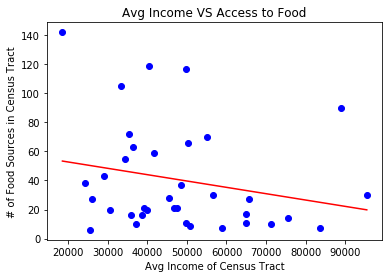

In [23]:
X = income_df.Income.values.reshape(-1, 1)
y = income_df.Food.values.reshape(-1, 1)
x_values = income_df['Income']
y_values = income_df['Food']
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
r_squared = r_value**2
print(f'The r-squared is {r_squared}')
model = LinearRegression()
model.fit(X, y)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
y_min = model.predict(x_min)
y_max = model.predict(x_max)
plt.scatter(X, y, c='blue')
plt.title("Avg Income VS Access to Food")
plt.xlabel("Avg Income of Census Tract")
plt.ylabel("# of Food Sources in Census Tract")
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.savefig('Images/income_vs_food.png')
plt.show()

The r-squared is 0.008019590151210475
Weight coefficients:  [[0.00255527]]
y-axis intercept:  [28.06238188]


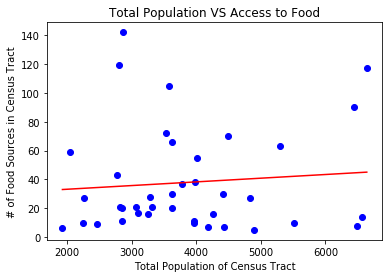

In [24]:
X = population_count.Population.values.reshape(-1, 1)
y = population_count.Food.values.reshape(-1, 1)
x_values = population_count['Population']
y_values = population_count['Food']
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
r_squared = r_value**2
print(f'The r-squared is {r_squared}')
model = LinearRegression()
model.fit(X, y)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
y_min = model.predict(x_min)
y_max = model.predict(x_max)
plt.scatter(X, y, c='blue')
plt.title("Total Population VS Access to Food")
plt.xlabel("Total Population of Census Tract")
plt.ylabel("# of Food Sources in Census Tract")
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.savefig('Images/population_vs_food.png')
plt.show()

The r-squared is 0.047429453509386585
Weight coefficients:  [[0.00255527]]
y-axis intercept:  [28.06238188]


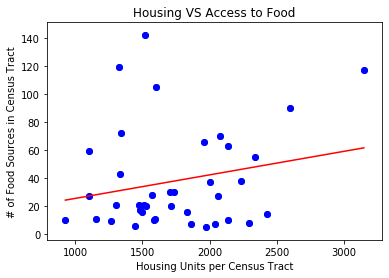

In [25]:
X = housing_count.Housing.values.reshape(-1, 1)
y = housing_count.Food.values.reshape(-1, 1)
x_values = housing_count['Housing']
y_values = housing_count['Food']
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
r_squared = r_value**2
print(f'The r-squared is {r_squared}')
plt.scatter(X, y)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
model = LinearRegression()
model.fit(X, y)
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
y_min = model.predict(x_min)
y_max = model.predict(x_max)
plt.scatter(X, y, c='blue')
plt.title("Housing VS Access to Food")
plt.xlabel("Housing Units per Census Tract")
plt.ylabel("# of Food Sources in Census Tract")
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.savefig('Images/housing_vs_food.png')
plt.show()

In [16]:
brand_new_df = income_avg.merge(population_count, on='Tract')
brand_new_df = brand_new_df.rename(columns = {'Household Income by Race': 'Income'})
brand_new_df = brand_new_df[['Income', 'Population']]
brand_new_df

,Income,Population
0,24322,3977
1,25489,1929
2,26000,2259
3,40542,2799
4,33229,3572
5,35940,3258
6,39922,3619
7,28962,2781
8,37244,2253
9,38750,4261


The r-squared is 0.31818517922556977
Weight coefficients:  [[0.03685584]]
y-axis intercept:  [1965.80950001]


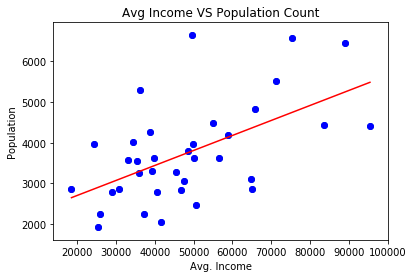

In [26]:
X = brand_new_df.Income.values.reshape(-1, 1)
y = brand_new_df.Population.values.reshape(-1, 1)
x_values = brand_new_df['Income']
y_values = brand_new_df['Population']
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
r_squared = r_value**2
print(f'The r-squared is {r_squared}')
plt.scatter(X, y)
model = LinearRegression()
model.fit(X, y)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
y_min = model.predict(x_min)
y_max = model.predict(x_max)
plt.scatter(X, y, c='blue')
plt.title("Avg Income VS Population Count")
plt.xlabel("Avg. Income")
plt.ylabel("Population")
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.savefig('Images/income_vs_population.png')
plt.show()

The r-squared is 0.839922423294193
Weight coefficients:  [[2.42278885]]
y-axis intercept:  [-350.86214811]


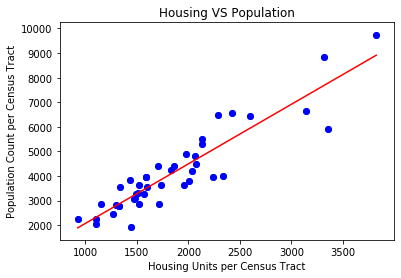

In [27]:
X = pop_housing_df.Housing.values.reshape(-1, 1)
y = pop_housing_df.Population.values.reshape(-1, 1)
x_values = pop_housing_df['Housing']
y_values = pop_housing_df['Population']
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
r_squared = r_value**2
print(f'The r-squared is {r_squared}')
plt.scatter(X, y)
model = LinearRegression()
model.fit(X, y)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
y_min = model.predict(x_min)
y_max = model.predict(x_max)
plt.scatter(X, y, c='blue')
plt.title("Housing VS Population")
plt.xlabel("Housing Units per Census Tract")
plt.ylabel("Population Count per Census Tract")
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.savefig('Images/housing_vs_population.png')
plt.show()